#### **1.0 Importing Libraries**

In [25]:
import pandas as pd 

# Visualization - Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

from PIL import Image # type: ignore

----

#### **1.1 📊 Descriptive Analysis 🔍**

In [26]:
data = pd.read_csv(r"C:\Users\MSI\Fraud detction MLops Project\data\fraud_oracle.csv")

In [27]:
num_rows, num_columns = data.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 15420 rows and 33 columns.


In [28]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [29]:
# Check for missing values
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

=> No missing data 

In [30]:
duplicate_rows = data.duplicated() # Check for duplicates
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


=> No duplicates

----

#### **1.2 Characteristic of Dataset**

In [31]:
# Function01: Summarize the characteristic of dataset

def summarize(DataFrame):
    
    summary = pd.DataFrame()
    
    # Data Type
    summary['Data Type'] = DataFrame.dtypes
    # N Unique
    summary['N Unique'] = DataFrame.nunique()
    # Unique
    summary['Unique'] = DataFrame.apply(lambda x: x.unique().tolist())
    # Max
    summary['Max'] = DataFrame.apply(lambda x: x.max() if pd.api.types.is_numeric_dtype(x) else '-')
    # Min
    summary['Min'] = DataFrame.apply(lambda x: x.min() if pd.api.types.is_numeric_dtype(x) else '-')
    
    # Measures of Central Tendency: Mean, Median, Mode 
    summary['Mean'] = DataFrame.apply(lambda x: round(x.mean(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Median'] = DataFrame.apply(lambda x: x.median() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Mode'] = DataFrame.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else '-')
    
    # Measures of Dispersion: Range, Variance, Standard Deviation
    summary['Range'] = DataFrame.apply(lambda x: x.max() - x.min() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Variance'] = DataFrame.apply(lambda x: x.var() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Standard Deviation'] = DataFrame.apply(lambda x: x.std() if pd.api.types.is_numeric_dtype(x) else '-')
    
    # Measures of Shape: Skewness, Kurtosis
    summary['Skewness'] = DataFrame.apply(lambda x: round(x.skew(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Kurtosis'] = DataFrame.apply(lambda x: round(x.kurt(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    
    return summary

In [32]:
Summary = summarize(data)
Summary

,Data Type,N Unique,Unique,Max,Min,Mean,Median,Mode,Range,Variance,Standard Deviation,Skewness,Kurtosis
Month,object,12,"[Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, ...",-,-,-,-,Jan,-,-,-,-,-
WeekOfMonth,int64,5,"[5, 3, 2, 4, 1]",5,1,2.79,3.0,3,4,1.657876,1.287585,0.12,-1.1
DayOfWeek,object,7,"[Wednesday, Friday, Saturday, Monday, Tuesday,...",-,-,-,-,Monday,-,-,-,-,-
Make,object,19,"[Honda, Toyota, Ford, Mazda, Chevrolet, Pontia...",-,-,-,-,Pontiac,-,-,-,-,-
AccidentArea,object,2,"[Urban, Rural]",-,-,-,-,Urban,-,-,-,-,-
DayOfWeekClaimed,object,8,"[Tuesday, Monday, Thursday, Friday, Wednesday,...",-,-,-,-,Monday,-,-,-,-,-
MonthClaimed,object,13,"[Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, ...",-,-,-,-,Jan,-,-,-,-,-
WeekOfMonthClaimed,int64,5,"[1, 4, 2, 3, 5]",5,1,2.69,3.0,2,4,1.585371,1.259115,0.16,-1.09
Sex,object,2,"[Female, Male]",-,-,-,-,Male,-,-,-,-,-
MaritalStatus,object,4,"[Single, Married, Widow, Divorced]",-,-,-,-,Married,-,-,-,-,-


**Observations👁️:**

- **Data Type 🧩:** 
The dataset includes a mix of numeric and categorical features, with some Boolean variables that need conversion for better
modeling.

- **N Unique 🔢:** Each feature has a varying number of unique values. Some features, like "Sex" or "Fault," have only two unique categories, while others may have more complex value distributions.

- **Unique Values 🆚**: Features like "PolicyNumber" or "AgentType" may have repetitive values, while others, like "Age," present more diversity.

- **Max & Min Values ⬆️⬇️**: Some features, like "Age," have reasonable ranges, but others, such as "Age" with a minimum value of 0, require attention to ensure data validity.

- **Measures of Central Tendency 📏:** Features like "Age" and "DriverRating" show typical values (mean, median, mode) that can inform the distribution of the data.

- **Range, Variance, Standard Deviation 📐:** Numeric features like "VehiclePrice" have a wide range and considerable variance, suggesting that they could be crucial for predicting fraud.

- **Kurtosis 📊:** Features with high kurtosis, like "DriverRating," indicate heavy tails in their distributions, which might suggest the presence of extreme values.

- **Skewness 📉:**  Certain features, such as "FraudFound_P" and "Deductible," exhibit skewed distributions, which might affect model accuracy and need transformation.

---

#### **2.0 ✨ Exploratory Data Analysis (EDA) 🔍**

**Why is EDA Necessary?**


**Data Understanding:**  🧠  EDA provides insights into the dataset, helping to understand its structure, distribution, and inherent patterns.

**Problem Indentification:**  🚩 It helps identify issues such as missing values, outliers, and anomalies that need to be addressed during data preprocessing.

**Informing Modeling Strategies:** 🛠️📈   Understanding the data helps in choosing the appropriate modeling techniques and preprocessing steps.

**Insight Discovery:** 💡🔗 EDA can reveal hidden patterns and relationships within the data, providing valuable insights for decision-making and 

strategy formulation

In [33]:
df_viz = data.copy()
df_viz.shape

(15420, 33)

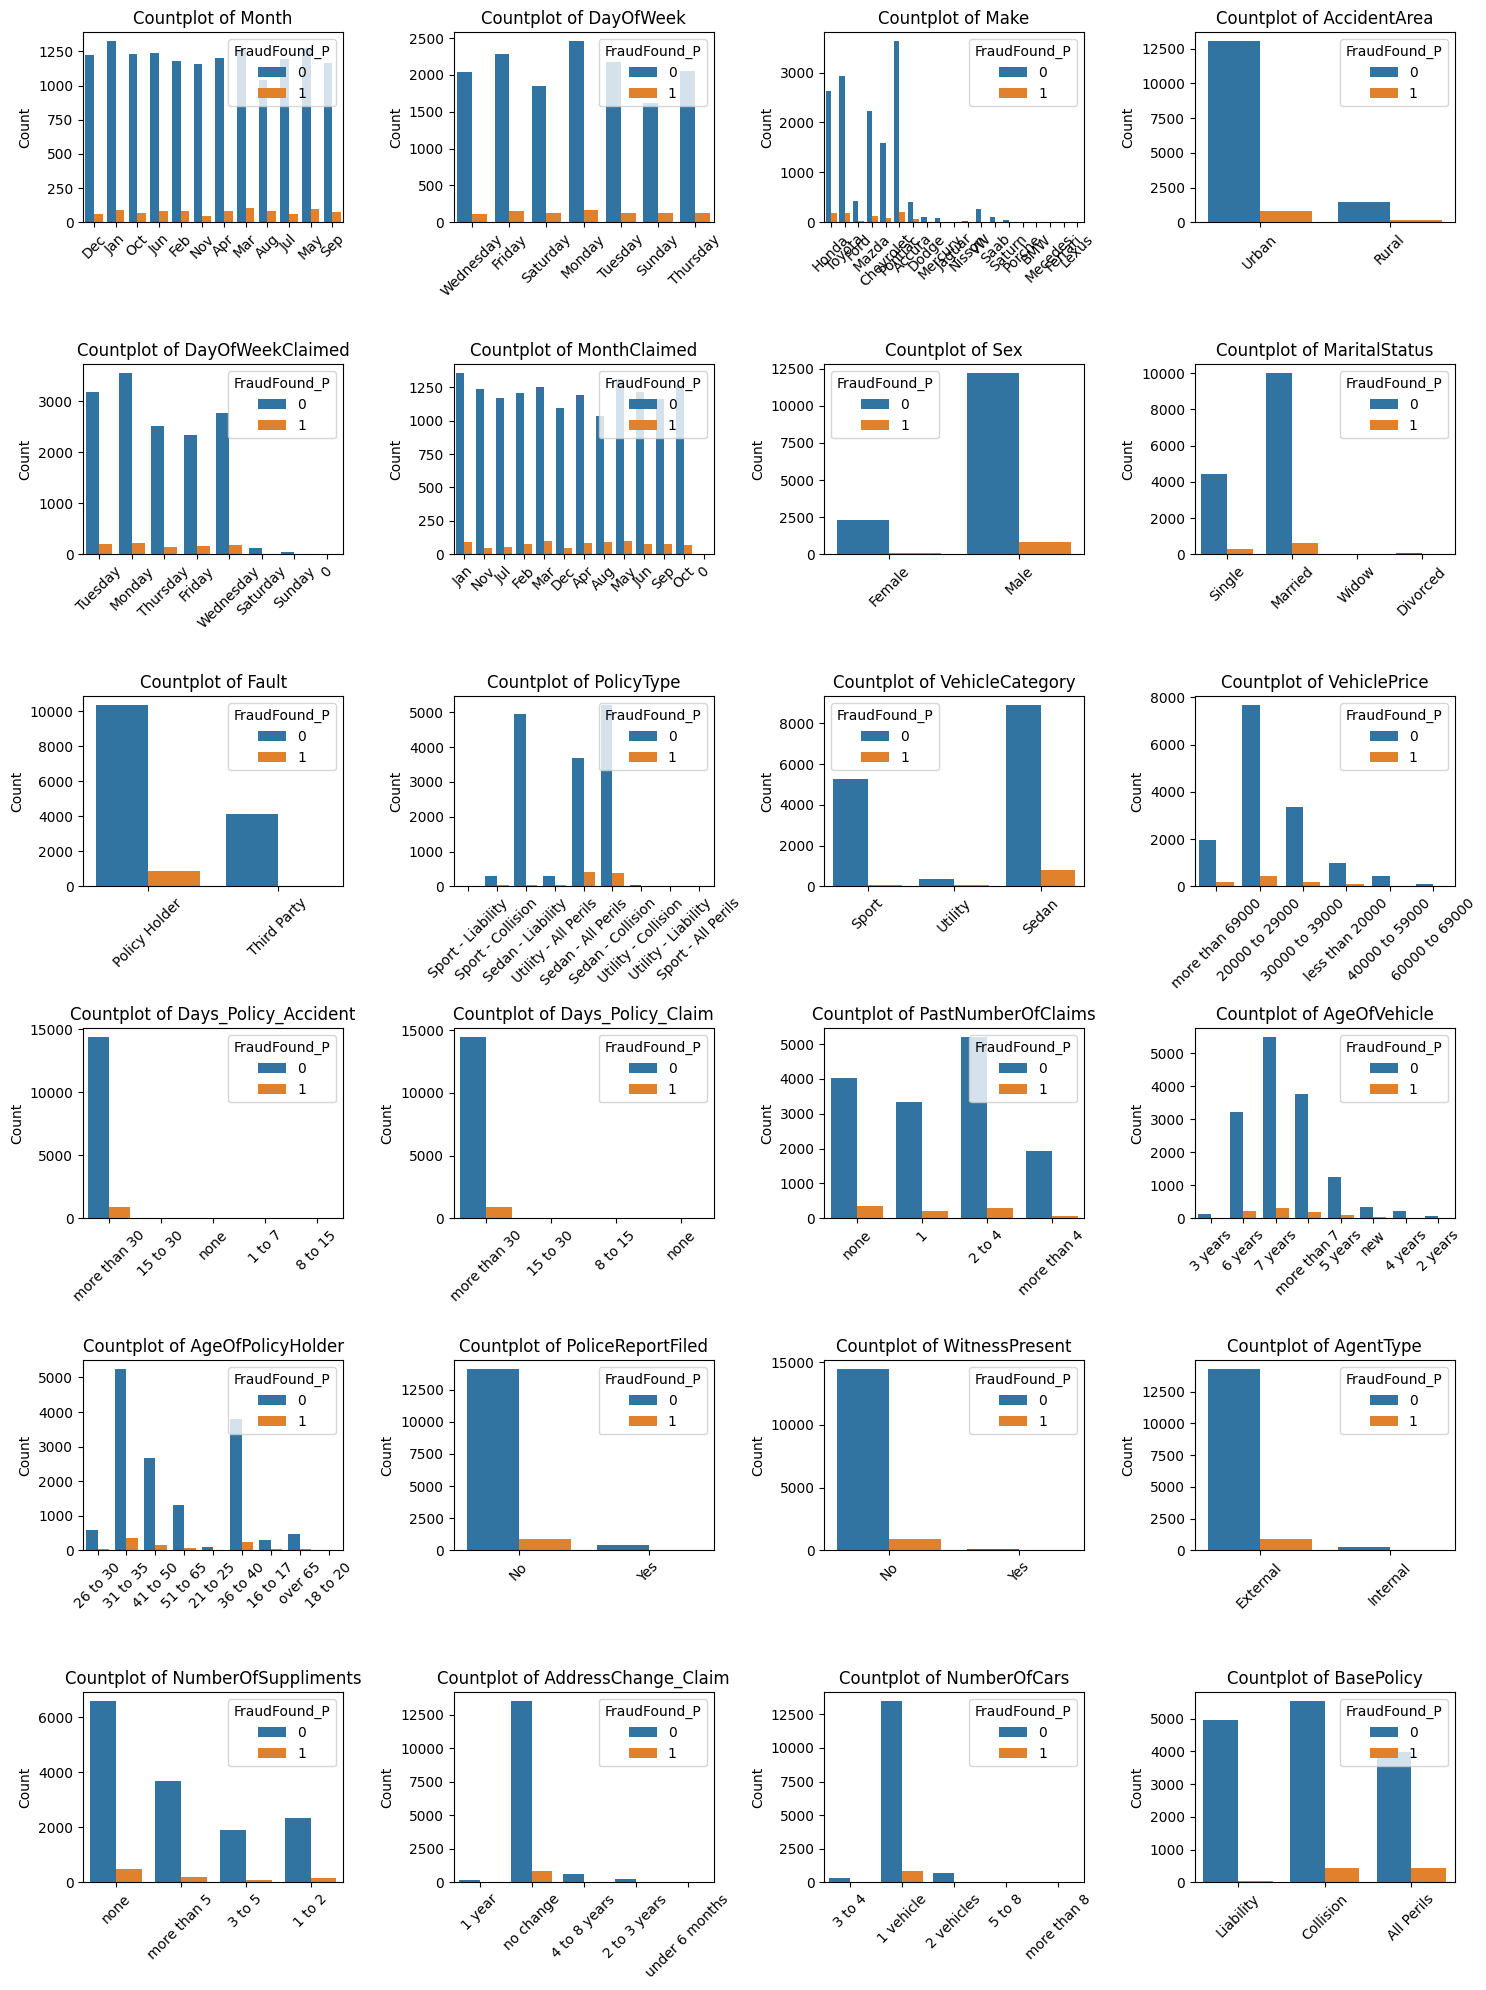

In [34]:
features = [col for col in data.columns if data[col].dtype == object and col != 'FraudFound_P']
num_rows = 6
num_columns = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Loop through features and create countplots in subplots
for i, feature in enumerate(features):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]

    sns.countplot(x=feature, data=data, ax=ax, hue='FraudFound_P')
    ax.set_title(f'Countplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Hide any empty subplots after plotting all features
for i in range(len(features), num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    fig.delaxes(axes[row, col]) 

plt.tight_layout()
plt.show()


We can see that for some features only one category is dominatiing and rest of the categories are limited in numbers
Lets see their distribution % wise

In [35]:
for i in features:
    print(i)
    print(round(data[i].value_counts()/len(data)*100,2))
    print("="*70)

Month
Month
Jan    9.15
May    8.87
Mar    8.82
Jun    8.57
Oct    8.46
Dec    8.33
Apr    8.30
Feb    8.21
Jul    8.15
Sep    8.04
Nov    7.79
Aug    7.31
Name: count, dtype: float64
DayOfWeek
DayOfWeek
Monday       16.96
Friday       15.86
Tuesday      14.92
Thursday     14.09
Wednesday    14.00
Saturday     12.85
Sunday       11.32
Name: count, dtype: float64
Make
Make
Pontiac      24.88
Toyota       20.24
Honda        18.16
Mazda        15.27
Chevrolet    10.90
Accura        3.06
Ford          2.92
VW            1.84
Dodge         0.71
Saab          0.70
Mercury       0.54
Saturn        0.38
Nisson        0.19
BMW           0.10
Jaguar        0.04
Porche        0.03
Mecedes       0.03
Ferrari       0.01
Lexus         0.01
Name: count, dtype: float64
AccidentArea
AccidentArea
Urban    89.64
Rural    10.36
Name: count, dtype: float64
DayOfWeekClaimed
DayOfWeekClaimed
Monday       24.36
Tuesday      21.89
Wednesday    19.14
Thursday     17.25
Friday       16.19
Saturday      0.82
Sund

It looks like a price tag for a data supermarket 🏷️💳📊

In the preprocessing phase , i will Handle Rare Categories (nchlh) ,like Combine rare categories into a single category called "Other" to avoid sparsity.
columns with rare categories : Make, NumberOfCars, 

In [36]:
features = [col for col in data.columns if data[col].dtype==object and col!='FraudFound_P']
features

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

---

#### **2.1 🎯 Target Balance Visualization** 📊


Target👉**FraudFound_P**: Indicates whether fraud was detected in the insurance claim.

In [37]:
Fraud_count= df_viz['FraudFound_P'].value_counts().reset_index()
Fraud_count.columns =['FraudFound_P','Count']
Fraud_count


,FraudFound_P,Count
0,0,14497
1,1,923


**Visualizing the target variable (binary: 0 and 1) as a pie chart 🥧**


In [38]:
fig = px.pie(Fraud_count, names='FraudFound_P', values='Count', color='FraudFound_P',color_discrete_map={0: '#B0E0E6', 1: '#FFB6C1'})
fig.update_traces(
    textinfo='percent',
    textfont={'size':16,'color':'Black'},
    marker=dict(line=dict(color='black', width=2)))
fig.update_layout(
    title={
        'text': 'Target Balance',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    })

fig.show()

**Observations on Target Variable 🚦**

- **Fraud_Found_P is Highly Imbalanced** 📊  


























  - Majority class dominates the dataset, causing imbalance.

**Issues with Imbalanced Target Variable ⚠️**  

1. **Model Bias**: Skewed learning towards the majority class 🧠➡️⚪.  

2. **Misleading Metrics**: High accuracy may just reflect majority predictions 📈❌.  

3. **Poor Generalization**: Struggles with minority class in real-world scenarios 🌍🤔.


**Why Oversampling? 🌟**

- **Improves Model Performance**: Helps predict minority class better 🏆📉. 

- **Enhances Evaluation Metrics**: Boosts Precision, Recall, and F1-Score accuracy 🔍✔️.

- **Balances Learning**: Ensures fair learning from both classes ⚖️📚.  


👉 **Next Step**: Perform **Oversampling** during **Data Preprocessing** 🔄✨.


----

#### **2.2 🔍 Analyzing Relationships Between Target and Features 📊**

##### **2.2.1  🚨 Fraud Detection by Sex 🚻**

In [39]:
df_fraud=df_viz[df_viz['FraudFound_P']==1]
fraud_counts_by_sex=df_fraud['Sex'].value_counts()
fraud_counts_by_sex

Sex
Male      818
Female    105
Name: count, dtype: int64

In [40]:
fraud_percentages_by_sex=(fraud_counts_by_sex/fraud_counts_by_sex.sum())*100
fraud_percentages_by_sex

Sex
Male      88.624052
Female    11.375948
Name: count, dtype: float64

In [41]:
#Bar chart 
fig = go.Figure()

fig.add_traces(go.Bar(x=fraud_counts_by_sex.index, y=fraud_counts_by_sex.values,
                      text=[f'{count} ({percentage:.2f}%)' for count, percentage in zip(fraud_counts_by_sex.values,fraud_percentages_by_sex)],
                      textposition='auto',marker_color=['rgba(31, 119, 180, 0.6)', 'rgba(255, 127, 14, 0.6)'], width=0.5))
fig.update_layout(
    title={
    'text':'Fraud Detection by Sex',
    'x': 0.5,
    'font':{'family':"Arial, sans-serif",'size':24}
    })

fig.update_layout(
    xaxis=dict(title='Sex'),
    yaxis=dict(title='Count'),
    showlegend=False)

fig.show()

This bar chart displays the percentage distribution of males and females in the dataset, with **males representing 88.62%** and **females representing 11.38%.**

👉The results suggest that **males** are significantly more likely to be involved in detected fraud cases compared to **females**. 🚹📊🚺


----

##### **2.2.2 Fraud Detection by Age** 🧑‍🤝‍🧑📊  **& Age of Policy Holder** 🧓👵🔍


In [42]:
df_fraud = df_viz[df_viz['FraudFound_P'] == 1]
df_non_fraud = df_viz[df_viz['FraudFound_P'] == 0]

df_counts_age = df_viz['Age'].value_counts().sort_index()
df_counts_fraud = df_fraud['Age'].value_counts().sort_index()

df_percentages_fraud = round((df_counts_fraud / df_counts_age) * 100, 2)

# Bar Chart
fig = go.Figure()

fig.add_trace(go.Bar(x=df_percentages_fraud.index, y=df_percentages_fraud.values,
    marker_color='rgba(31, 119, 180, 0.7)'))

fig.update_layout(
    title={
        'text': 'Fraud Detection by Age',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    })

fig.update_layout(
    xaxis=dict(title='Age'), yaxis=dict(title='Percentage', range=[0, 20], dtick=2), legend=dict(title='Outcome'))

fig.add_shape(
    type="line",
    x0=min(df_percentages_fraud.index),
    y0=6,
    x1=max(df_percentages_fraud.index),
    y1=6,
    line=dict(
        color="rgba(255, 0, 0, 0.8)",
        width=2,
        dash="dashdot",
    ),
)

fig.show()

In [43]:
df_fraud = df_viz[df_viz['FraudFound_P'] == 1]
df_non_fraud = df_viz[df_viz['FraudFound_P'] == 0]

df_counts_ageofpolicyholder = df_viz['AgeOfPolicyHolder'].value_counts().sort_index()
df_counts_fraud_ = df_fraud['AgeOfPolicyHolder'].value_counts().sort_index()

df_percentages_fraud_ = round((df_counts_fraud_ / df_counts_ageofpolicyholder) * 100, 2)

# Bar Chart
fig = go.Figure()

fig.add_trace(go.Bar(x=df_percentages_fraud_.index, y=df_percentages_fraud_.values,
    marker_color='rgba(31, 119, 180, 0.7)'))

fig.update_layout(
    title={
        'text': 'Fraud Detection by Age of Policy Holder',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    })

fig.update_layout(
    xaxis=dict(title='Age of Policy Holder'), yaxis=dict(title='Percentage', range=[0, 20], dtick=2), legend=dict(title='Outcome'))

fig.add_shape(
    type="line",
    x0=-1,
    y0=6,
    x1=10,
    y1=6,
    line=dict(
        color="rgba(255, 0, 0, 0.8)",
        width=2,
        dash="dashdot",
    ),
)

fig.show()


**Age:** The age of the policyholder.

**AgeOfPolicyHolder:** The age of the policyholder.

---

##### **2.2.3 Fraud Detection by Make** 🚗🔍📊

In [44]:
df_counts_make = df_viz['Make'].value_counts().sort_index()
df_counts_fraud2 = df_fraud['Make'].value_counts().sort_index()
df_percentages_fraud2 = pd.DataFrame(round((df_counts_fraud2 / df_counts_make) * 100, 2)).fillna(0).reset_index()

df_percentages_fraud2.columns = ['Make', 'Fraud %']
df_percentages_fraud2 = df_percentages_fraud2.sort_values(by=['Fraud %', 'Make'])

# Bar Chart
fig = go.Figure()

fig.add_trace(go.Bar(x=df_percentages_fraud2['Fraud %'], y=df_percentages_fraud2['Make'], orientation='h',
    marker_color='lightcoral'))

fig.update_layout(
    title={
        'text': 'Fraud Detection by Make',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    })

fig.update_layout(
    xaxis=dict(title='Percentage', range=[0, 30], dtick=2), yaxis=dict(title='Make'), legend=dict(title='Outcome'), bargap=0.3)

fig.add_shape(
    type="line",
    x0=6,
    y0=0,
    x1=6,
    y1=len(df_percentages_fraud2['Make']) - 1,
    line=dict(
        color="rgba(128, 128, 128, 1)",
        width=2,
        dash="dashdot", 
    ),
)

fig.show()


Some brands (e.g., Pontiac, Toyota, Honda) are more frequent, while others (e.g., Ferrari, Lexus) are very rare.
The presence of rare categories may affect machine learning models.

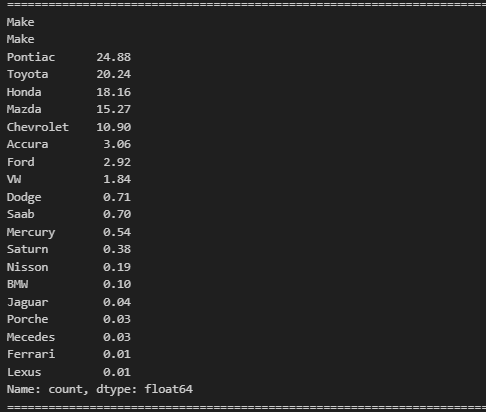

In [50]:
MakeImage=Image.open(r"C:\Users\MSI\Fraud detction MLops Project\notebooks\images\Make.png")
MakeImage

In Preprocessing phase : Handle Rare Categories
Combine rare categories into a single category called "Other" to avoid sparsity.
for example Group all brands with a frequency of less than 1%.

##### **2.2.4 Fraud Detection by Vehicle Price** 🚗💰🔍📊  

In [46]:
df_counts_vp = df_viz['VehiclePrice'].value_counts().sort_index()
df_counts_fraud3 = df_fraud['VehiclePrice'].value_counts().sort_index()
df_percentages_fraud3 = pd.DataFrame(round((df_counts_fraud3 / df_counts_vp) * 100, 2)).fillna(0).reset_index()

df_percentages_fraud3.columns = ['VehiclePrice', 'Fraud %']
df_percentages_fraud3 = df_percentages_fraud3.sort_values(by=['Fraud %'])

# Bar Chart
fig = go.Figure()

fig.add_trace(go.Bar(x=df_percentages_fraud3['Fraud %'], y=df_percentages_fraud3['VehiclePrice'], orientation='h',
    marker_color='#9FF781'))

fig.update_layout(
    title={
        'text': 'Fraud Detection by VehiclePrice',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    })

fig.update_layout(
    xaxis=dict(title='Percentage', range=[0, 16], dtick=2), yaxis=dict(title='VehiclePrice'), legend=dict(title='Outcome'), bargap=0.3)

fig.add_shape(
    type="line",
    x0=6,
    y0=0,
    x1=6,
    y1=5.5,
    line=dict(
        color="rgba(0, 100, 0, 1)",
        width=2,
        dash="dashdot", 
    ),
)

fig.show()

##### **2.2.5 Fraud Detection by Base Policy** 🛡️📑🔍 **& Policy Type** 📝🚗📊  

In [47]:
# BasePolicy
df_counts_policy = df_viz['BasePolicy'].value_counts().sort_index()
df_counts_fraud4 = df_fraud['BasePolicy'].value_counts().sort_index()
df_percentages_fraud4 = pd.DataFrame(round((df_counts_fraud4 / df_counts_policy) * 100, 2)).fillna(0).reset_index()

df_percentages_fraud4.columns = ['BasePolicy', 'Fraud %']
df_percentages_fraud4 = df_percentages_fraud4.sort_values(by=['Fraud %'])

# PolicyType
df_counts_policy2 = df_viz['PolicyType'].value_counts().sort_index()
df_counts_fraud5 = df_fraud['PolicyType'].value_counts().sort_index()
df_percentages_fraud5 = pd.DataFrame(round((df_counts_fraud5 / df_counts_policy2) * 100, 2)).fillna(0).reset_index()

df_percentages_fraud5.columns = ['PolicyType', 'Fraud %']
df_percentages_fraud5 = df_percentages_fraud5.sort_values(by=['Fraud %'])

# Bar Chart - Subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('BasePolicy', "PolicyType"))

fig.add_trace(go.Bar(x=df_percentages_fraud4['BasePolicy'], y=df_percentages_fraud4['Fraud %'],
    marker_color='skyblue'), row=1, col=1)

fig.add_trace(go.Bar(x=df_percentages_fraud5['PolicyType'], y=df_percentages_fraud5['Fraud %'],
    marker_color='coral'), row=1, col=2)

fig.update_layout(
    title={
        'text': 'Fraud Detection by BasePolicy & PolicyType',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    }, showlegend=False)

fig.add_shape(
    type="line",
    x0=-1,
    y0=6,
    x1=3,
    y1=6,
    line=dict(
        color="rgba(128, 128, 128, 1)", 
        width=2,
        dash="dashdot",
    ),
    xref="x1",
    yref="y1"
)

fig.add_shape(
    type="line",
    x0=-1,
    y0=6,
    x1=9,
    y1=6,
    line=dict(
        color="rgba(128, 128, 128, 1)", 
        width=2,
        dash="dashdot",
    ),
    xref="x2",
    yref="y2"
)

fig.show()


----

##### **2.2.6 Fraud Detection by Age of Vehicle** 🚗⏳🔍📊  


In [48]:
# Age of Vehicle
df_counts_ageofvehicle = df_viz['AgeOfVehicle'].value_counts().sort_index()
df_counts_fraud6 = df_fraud['AgeOfVehicle'].value_counts().sort_index()
df_percentages_fraud6 = pd.DataFrame(round((df_counts_fraud6 / df_counts_ageofvehicle) * 100, 2)).fillna(0).reset_index()

df_percentages_fraud6.columns = ['AgeOfVehicle', 'Fraud %']
df_percentages_fraud6 = df_percentages_fraud6.sort_values(by=['Fraud %'])

# Bar Chart
fig = go.Figure()

fig.add_trace(go.Bar(x=df_percentages_fraud6['Fraud %'], y=df_percentages_fraud6['AgeOfVehicle'], orientation='h',
    marker_color='rgb(255, 165, 0)'))

fig.update_layout(
    title={
        'text': 'Fraud Detection by Age of Vehicle',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    })

fig.update_layout(
    xaxis=dict(title='Percentage', range=[0, 16], dtick=2), yaxis=dict(title='AgeOfVehicle'), legend=dict(title='Outcome'), bargap=0.3)

fig.add_shape(
    type="line",
    x0=6,
    y0=-1,
    x1=6,
    y1=8,
    line=dict(
        color="rgba(0, 100, 0, 1)",
        width=2,
        dash="dashdot", 
    ),
)

fig.show()

**Key Insights:**

**🚗 Highest Fraud Detection:** Vehicles categorized as "4 years old" and "New" 🚘 show the highest percentages of fraud detection, implying a higher 

 likelihood of fraud in these groups.

**🛠️ Lowest Fraud Detection:** "2 years" and "More than 7 years"  have the lowest percentages, suggesting these age groups are less associated with

  fraud.

**📊 General Pattern:** Fraud percentages vary across vehicle ages, with newer or moderately aged vehicles 🆕 being more fraud-prone than very old vehicles.

📈 Dashed Green Line: The vertical dashed green line represents an average or reference fraud percentage, helping compare each vehicle age group against

this benchmark. Groups exceeding this line might indicate areas requiring closer monitoring.


**Implications:**


**🔍 Fraud Detection Focus:** Fraud detection systems could prioritize auditing claims for "4 years" and "New" vehicle categories.

**⚙️ Predictive Feature:** Vehicle age might be an important predictive feature for fraud analysis in my dataset.

---

##### **2.2.7 Fraud Detection by Month** 📅🔍 **& Month Claimed** 🗓️🚗📊  


In [49]:
# Month
df_counts_month = df_viz['Month'].value_counts().sort_index()
df_counts_fraud7 = df_fraud['Month'].value_counts().sort_index()
df_percentages_fraud7 = pd.DataFrame(round((df_counts_fraud7 / df_counts_month) * 100, 2)).fillna(0).reset_index()

df_percentages_fraud7.columns = ['Month', 'Fraud %']

# MonthClaimed
df_counts_monthclaimed = df_viz['MonthClaimed'].value_counts().sort_index()
df_counts_fraud8 = df_fraud['MonthClaimed'].value_counts().sort_index()
df_percentages_fraud8 = pd.DataFrame(round((df_counts_fraud8 / df_counts_monthclaimed) * 100, 2)).fillna(0).reset_index()

df_percentages_fraud8.columns = ['MonthClaimed', 'Fraud %']

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Bar Chart - Subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Month', "MonthClaimed"))

fig.add_trace(go.Bar(x=df_percentages_fraud7['Month'], y=df_percentages_fraud7['Fraud %'],
    marker_color='#8A2BE2'), row=1, col=1)

fig.add_trace(go.Bar(x=df_percentages_fraud8['MonthClaimed'], y=df_percentages_fraud8['Fraud %'],
    marker_color='#FF4500'), row=1, col=2)

fig.update_layout(
    title={
        'text': 'Fraud Detection by Month & MonthClaimed',
        'x':0.5,
        'font': {'family': "Arial, sans-serif", 'size': 24}
    }, showlegend=False,
    xaxis=dict(categoryorder='array', categoryarray=month_order),
    xaxis2=dict(categoryorder='array', categoryarray=month_order))

fig.add_shape(
    type="line",
    x0=-1,
    y0=6,
    x1=12,
    y1=6,
    line=dict(
        color="rgba(128, 128, 128, 1)", 
        width=2,
        dash="dashdot",
    ),
    xref="x1",
    yref="y1"
)

fig.add_shape(
    type="line",
    x0=-1,
    y0=6,
    x1=12.5,
    y1=6,
    line=dict(
        color="rgba(128, 128, 128, 1)", 
        width=2,
        dash="dashdot",
    ),
    xref="x2",
    yref="y2"
)

fig.show()

**MonthClaimed:** The month in which the insurance claim was processed.

**Month:** The month in which the insurance claim was made.

**Month** and **MonthClaimed**  have similar distributions 

----